# Project for Applied Statistics as part of the higher diploma in Computer Science and Data Analytics 2024


This project will be looking at the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html).  This is a collection of data from an experiment where plants were given two different treatment conditions (plus a control)and their yield was then compared. 

The tasks objectives of the project are below;

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Task 1
Download and save the dataset to your repository

In [78]:
df = pd.read_csv("PlantGrowth.csv")  
df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


### Task 2

Describe the data set in your notebook.


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


We can see from the above that dataframe up of 30 samples taken from 3 different groups, Control (ctrl), Treatment 1 (trt1) and Treatment 2 (trt2). Next we will plot their weights to show the distribution.

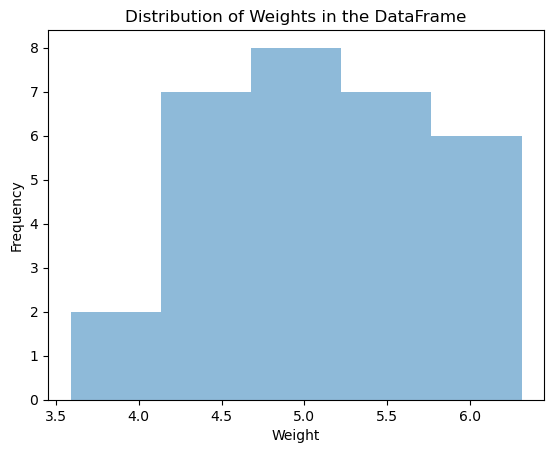

In [88]:
# Plot of the dataframe

#Square Root Rule for number of bins

b = int(np.sqrt(30))
b

plt.hist(df["weight"], b, alpha= 0.5, label="control")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weights in the DataFrame")
plt.show()

In [80]:
ctrl = df[df["group"]=="ctrl"]
ctrl.describe()

,rownames,weight
count,10.00000,10.000000
mean,5.50000,5.032000
std,3.02765,0.583091
min,1.00000,4.170000
25%,3.25000,4.550000
50%,5.50000,5.155000
75%,7.75000,5.292500
max,10.00000,6.110000


There are 10 samples from the control group and the average weight is 5.03 grams

In [81]:
trt1 = df[df["group"]=="trt1"]
trt1.describe()

,rownames,weight
count,10.00000,10.000000
mean,15.50000,4.661000
std,3.02765,0.793676
min,11.00000,3.590000
25%,13.25000,4.207500
50%,15.50000,4.550000
75%,17.75000,4.870000
max,20.00000,6.030000


There are 10 samples from the Treatment 1 group and the average weight is 4.66 grams

In [82]:
trt2 = df[df["group"]=="trt2"]
trt2.describe()

,rownames,weight
count,10.00000,10.000000
mean,25.50000,5.526000
std,3.02765,0.442573
min,21.00000,4.920000
25%,23.25000,5.267500
50%,25.50000,5.435000
75%,27.75000,5.735000
max,30.00000,6.310000


There are 10 samples from the Treatment 2 group and the average weight is 5.53 grams

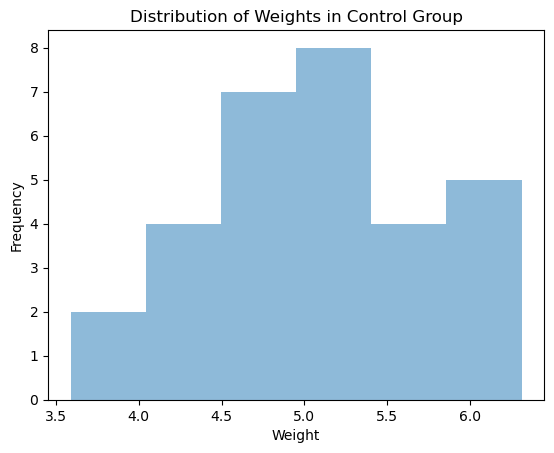

In [87]:
# Plot of the dataframe

plt.hist(df["weight"], 6, alpha= 0.5, label="control")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weights in Control Group")
plt.show()